# Final Data Science Project - Tesla & GameStop Stock and Revenue Analysis

In [13]:
!pip install yfinance pandas matplotlib bs4 requests lxml

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
# Tesla Revenue Data
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace(",", "").replace("$", "")
                if revenue and revenue != "":  # skip empty
                    tesla_revenue = pd.concat([
                        tesla_revenue,
                        pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
                    ], ignore_index=True)

tesla_revenue.tail()



,Date,Revenue


In [16]:
# GameStop Stock Data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
# GameStop Revenue Data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace(",", "").replace("$", "")
                if revenue and revenue != "":
                    gme_revenue = pd.concat([
                        gme_revenue,
                        pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
                    ], ignore_index=True)

gme_revenue.tail()



,Date,Revenue


In [18]:
# Dashboard Plot Function
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(pd.to_datetime(revenue_data['Date']), revenue_data['Revenue'].astype(float), color='orange', label='Revenue')
    ax2.set_ylabel('Revenue (in USD)', color='orange')

    plt.title(title)
    plt.grid()
    plt.show()


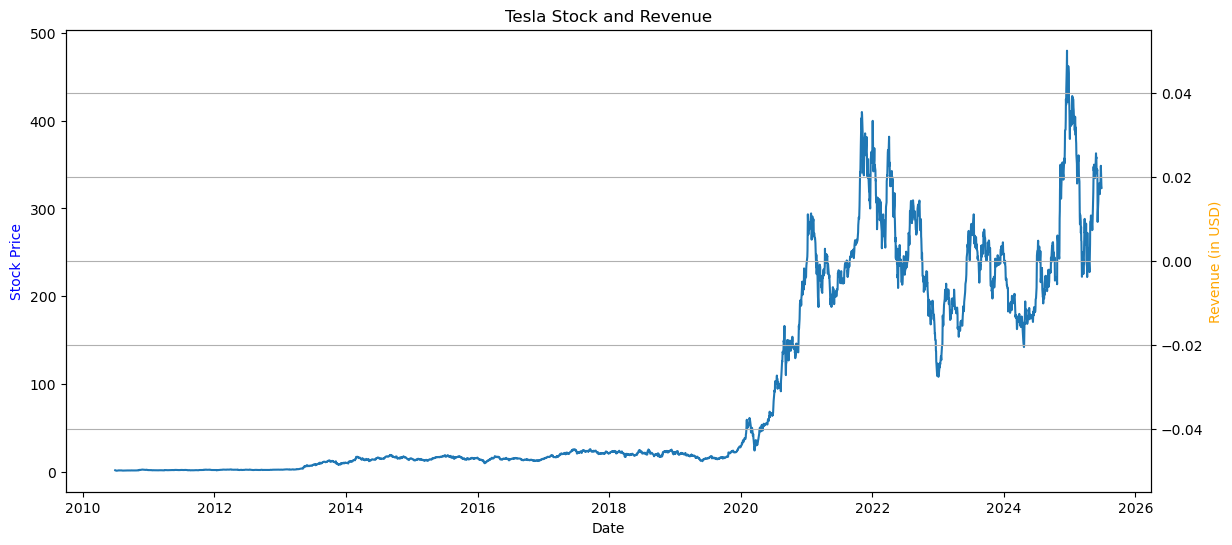

In [19]:
# Tesla Dashboard
make_graph(tesla_data, tesla_revenue, "TSLA", "Tesla Stock and Revenue")


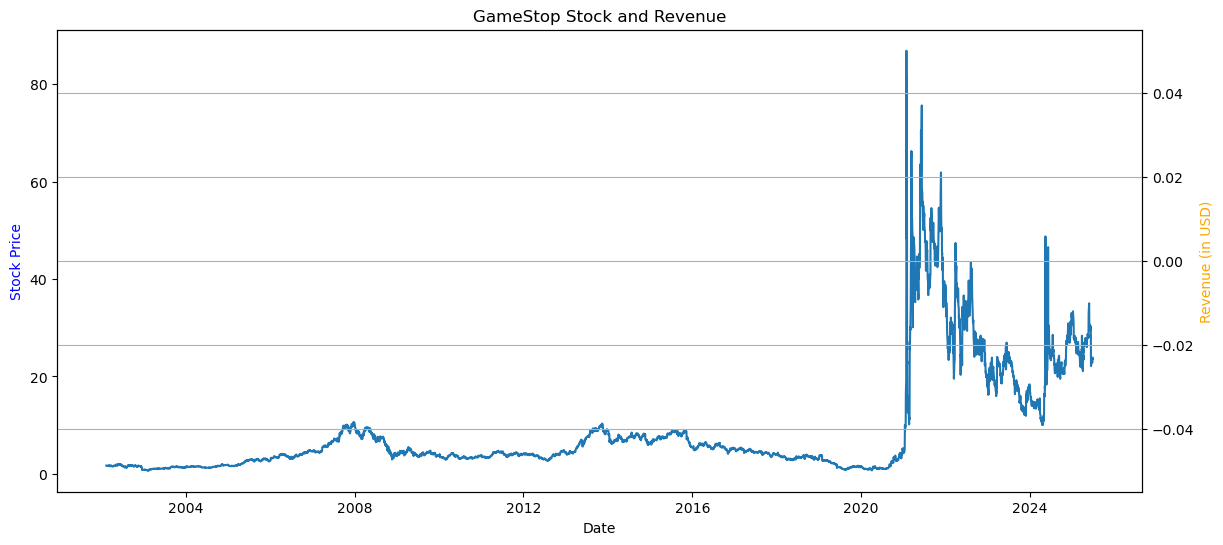

In [20]:
# GameStop Dashboard
make_graph(gme_data, gme_revenue, "GME", "GameStop Stock and Revenue")
